In [1]:
# https://www.youtube.com/watch?v=w54b0Z9HvUA

# In facebook prophet we need not to test the stationarity test

In [2]:
# !pip install prophet

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from prophet import Prophet

In [4]:
import os
os.getcwd()
os.chdir('..')


In [5]:
os.getcwd()

'C:\\Users\\Prabal Kuinkel\\Desktop\\Data Analyst\\100-Days-of-ML'

In [6]:
df = pd.read_csv('Data-sets\AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
df.shape

(144, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [9]:
#Converting the Month into datetime
df['Month']=pd.to_datetime(df['Month'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [11]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [12]:
df.rename(columns={
    'Month':'ds',
    '#Passengers':'y'
},inplace=True)
df.head(3)

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132


In [13]:
df['y_original'] = df['y'] ## Saving a copy of original y
df['y']=np.log(df['y'])  ## log transform the y 
df.head(3)

,ds,y,y_original
0,1949-01-01,4.718499,112
1,1949-02-01,4.770685,118
2,1949-03-01,4.882802,132


In [14]:
df.tail(5)

,ds,y,y_original
139,1960-08-01,6.406880,606
140,1960-09-01,6.230481,508
141,1960-10-01,6.133398,461
142,1960-11-01,5.966147,390
143,1960-12-01,6.068426,432


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ds', ylabel='y_original'>

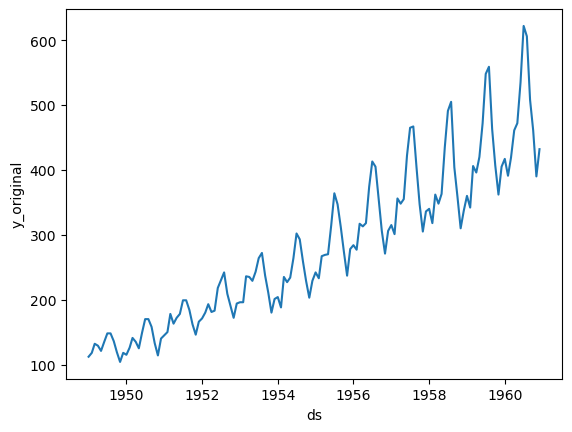

In [15]:
sns.lineplot(data=df,x='ds',y='y_original')

In [16]:
model = Prophet()
model.fit(df)

10:58:59 - cmdstanpy - INFO - Chain [1] start processing
10:59:00 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
'''     'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''

#future_data = model.make_future_dataframe(periods=6, freq = 'H')
future_data = model.make_future_dataframe(periods=10, freq = 'M',)
future_data.tail(12)

C:\Users\Prabal Kuinkel\AppData\Roaming\Python\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
142,1960-11-01
143,1960-12-01
144,1960-12-31
145,1961-01-31
146,1961-02-28
147,1961-03-31
148,1961-04-30
149,1961-05-31
150,1961-06-30
151,1961-07-31


In [20]:
forecast_data = model.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
144,1960-12-31,6.133639,6.087555,6.179322
145,1961-01-31,6.103821,6.056104,6.147837
146,1961-02-28,6.274845,6.228614,6.322015
147,1961-03-31,6.206525,6.160968,6.249283
148,1961-04-30,6.249189,6.205500,6.295867
149,1961-05-31,6.344261,6.296805,6.388527
150,1961-06-30,6.506764,6.460214,6.549453
151,1961-07-31,6.485906,6.441764,6.531513
152,1961-08-31,6.365079,6.314850,6.414764
153,1961-09-30,6.207597,6.156182,6.257440


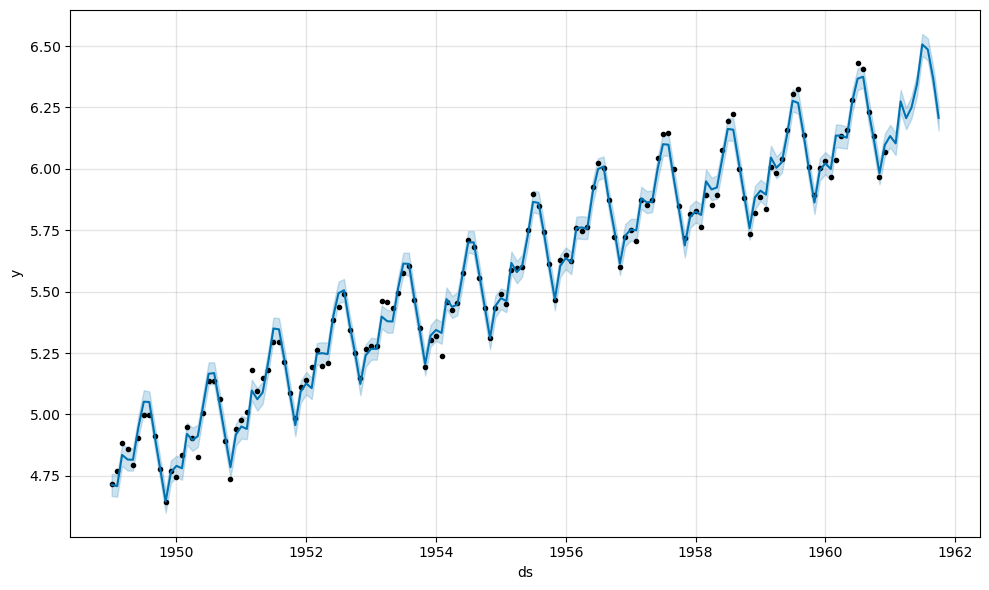

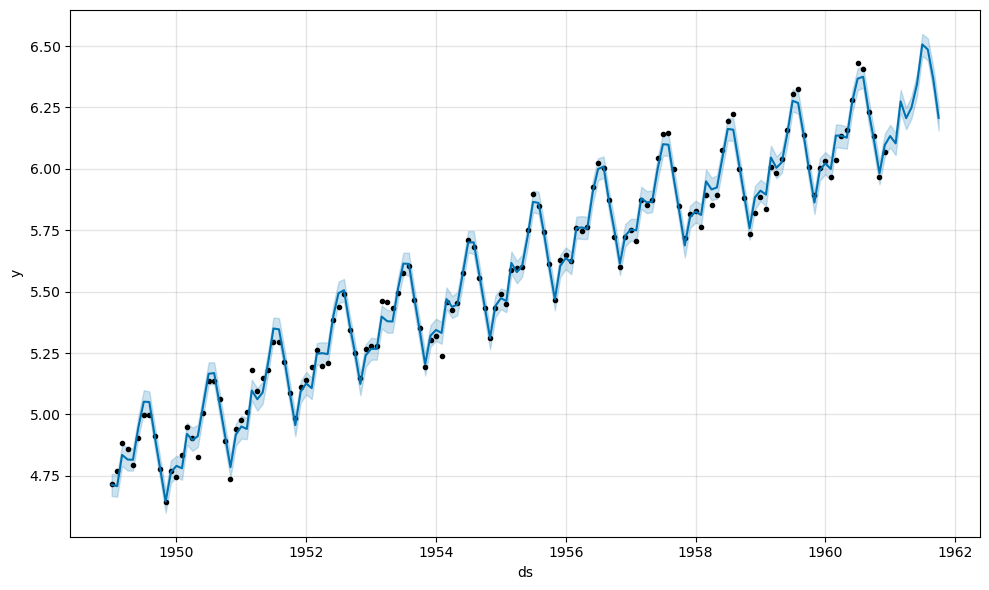

In [21]:
model.plot(forecast_data)

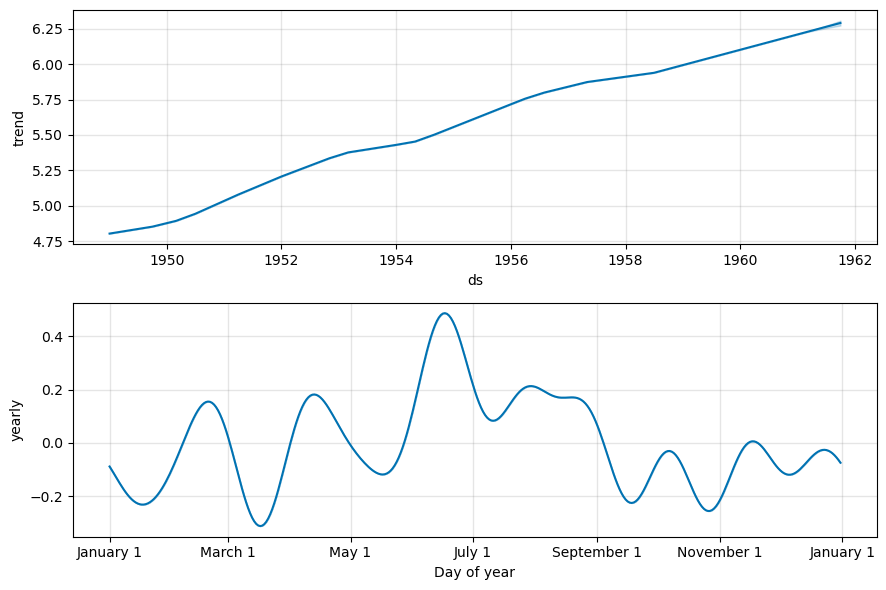

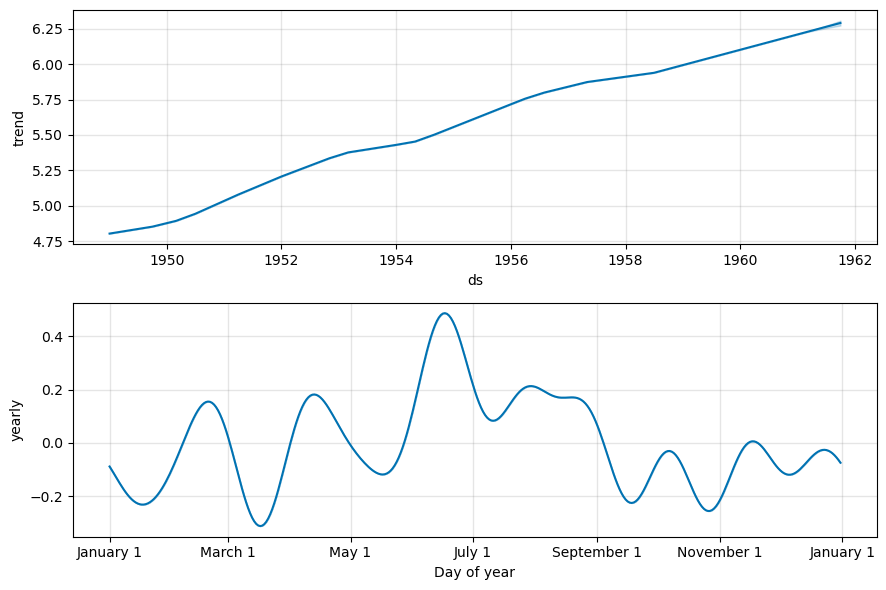

In [22]:
model.plot_components(forecast_data)

In [23]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

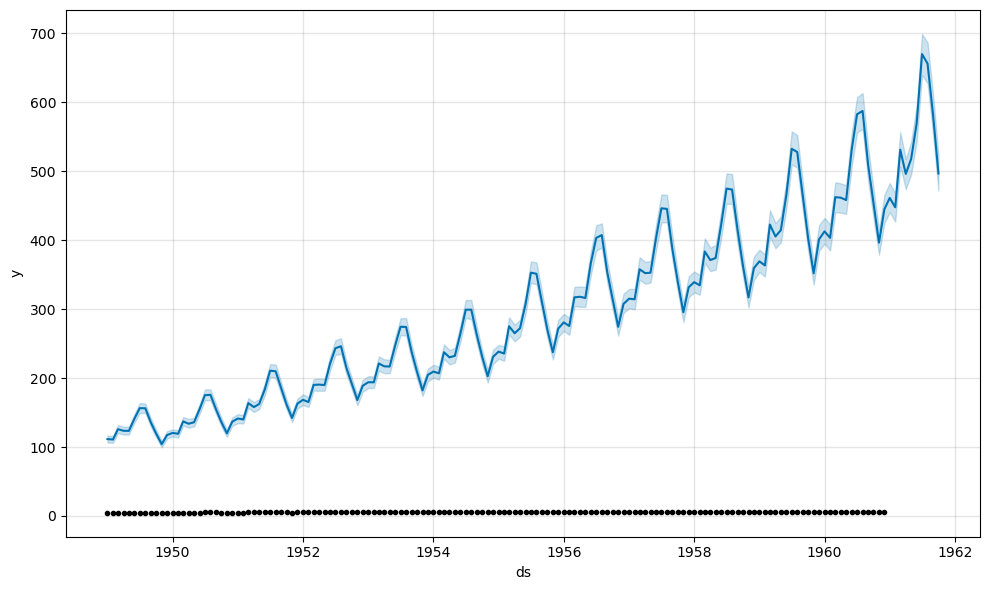

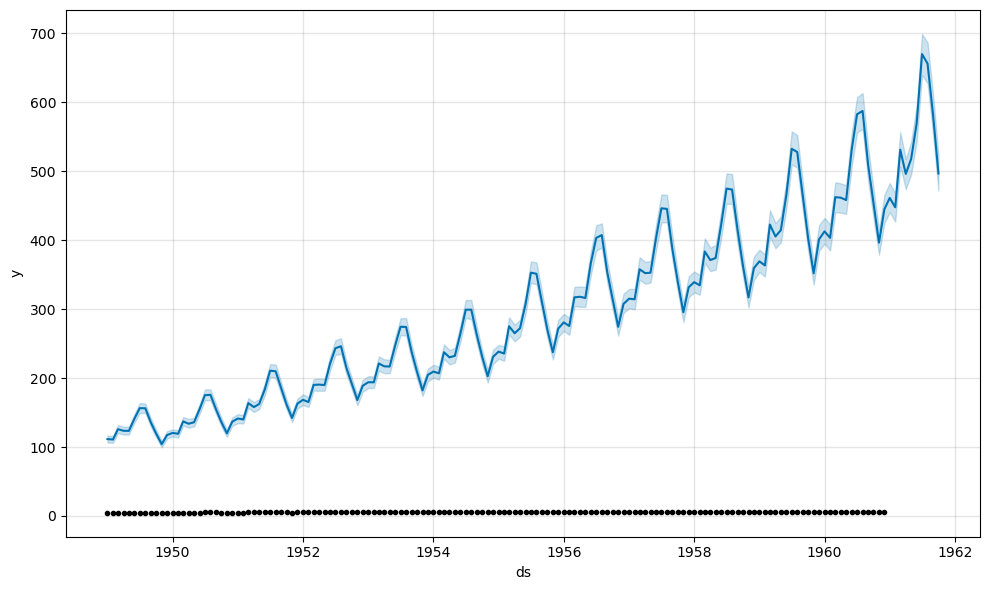

In [24]:
model.plot(forecast_data_orig)

In [26]:
df['y_log']=df['y'] #copy the log-transformed data to another column
df['y']=df['y_original']

In [27]:
final_df = pd.DataFrame(forecast_data_orig)

In [28]:
final_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,4.802627,106.481493,116.580939,4.802627,4.802627,-0.088786,-0.088786,-0.088786,-0.088786,-0.088786,-0.088786,0.0,0.0,0.0,111.479557
1,1949-02-01,4.808194,106.159232,116.169021,4.808194,4.808194,-0.100080,-0.100080,-0.100080,-0.100080,-0.100080,-0.100080,0.0,0.0,0.0,110.842922
2,1949-03-01,4.813221,120.354366,131.668405,4.813221,4.813221,0.021981,0.021981,0.021981,0.021981,0.021981,0.021981,0.0,0.0,0.0,125.864074
3,1949-04-01,4.818788,118.079172,129.573425,4.818788,4.818788,-0.002275,-0.002275,-0.002275,-0.002275,-0.002275,-0.002275,0.0,0.0,0.0,123.533617
4,1949-05-01,4.824175,118.096420,129.347506,4.824175,4.824175,-0.008738,-0.008738,-0.008738,-0.008738,-0.008738,-0.008738,0.0,0.0,0.0,123.400707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1961-05-31,6.255732,542.834733,594.979330,6.248430,6.262127,0.088529,0.088529,0.088529,0.088529,0.088529,0.088529,0.0,0.0,0.0,569.216589
150,1961-06-30,6.264635,639.197736,698.862119,6.254864,6.273008,0.242128,0.242128,0.242128,0.242128,0.242128,0.242128,0.0,0.0,0.0,669.655605
151,1961-07-31,6.273835,627.513007,686.436123,6.261674,6.284062,0.212070,0.212070,0.212070,0.212070,0.212070,0.212070,0.0,0.0,0.0,655.832670
152,1961-08-31,6.283036,552.719321,610.796682,6.267849,6.296727,0.082044,0.082044,0.082044,0.082044,0.082044,0.082044,0.0,0.0,0.0,581.190905
